In [15]:
import pandas as pd
df = pd.read_csv("data/results.csv")
df

,Gender,Event,Location,Year,Medal,Name,Nationality,Result
0,M,10000M Men,Rio,2016,G,Mohamed FARAH,USA,25:05.17
1,M,10000M Men,Rio,2016,S,Paul Kipngetich TANUI,KEN,27:05.64
2,M,10000M Men,Rio,2016,B,Tamirat TOLA,ETH,27:06.26
3,M,10000M Men,Beijing,2008,G,Kenenisa BEKELE,ETH,27:01.17
4,M,10000M Men,Beijing,2008,S,Sileshi SIHINE,ETH,27:02.77
...,...,...,...,...,...,...,...,...
2389,W,Triple Jump Women,Athens,2004,S,Hrysopiyi DEVETZI,GRE,15.25
2390,W,Triple Jump Women,Athens,2004,B,Tatyana LEBEDEVA,RUS,15.14
2391,W,Triple Jump Women,Atlanta,1996,G,Inessa KRAVETS,UKR,15.33
2392,W,Triple Jump Women,Atlanta,1996,S,Inna LASOVSKAYA,RUS,14.98


In [40]:
#athlete_events = pd.read_csv("data/athlete_events.csv")
df = df[(df["Event"] == "10000M Men") & (df["Medal"] == "S")].sort_values(by="Year")
#plt.plot(df['Year'], df['Result_seconds'])
df_index = df.set_index("Year")
#autocorrelation plots to figure out what model to use
#model predictions, test accuracy

def round_time_string(time_string):
  """Rounds a time string in the format mm:ss.s to mm:ss.

  Args:
    time_string: The time string to round.

  Returns:
    The rounded time string.
  """
  minutes, seconds_decimal = time_string.split(":")
  seconds, decimal = seconds_decimal.split(".")
  seconds = int(seconds)
  decimal = int(decimal)

  if decimal >= 5:
    seconds += 1
  
  seconds = str(seconds).zfill(2)
  return f"{minutes}:{seconds}"
df_index["rounded_results"] = df_index['Result'].apply(round_time_string)

def mm_ss_to_seconds(time_str):
  """Converts a time string in the format mm:ss to seconds.

  Args:
    time_str: The time string to convert.

  Returns:
    The total number of seconds represented by the time string.
  """
  minutes, seconds = map(int, time_str.split(':'))
  return minutes * 60 + seconds
df_index["results_seconds"] = df_index['rounded_results'].apply(mm_ss_to_seconds)
df_index

,Gender,Event,Location,Medal,Name,Nationality,Result,rounded_results,results_seconds
Year,,,,,,,,,
1912,M,10000M Men,Stockholm,S,Lewis TEWANIMA,USA,32:06.6,32:07,1927
1920,M,10000M Men,Antwerp,S,Joseph GUILLEMOT,FRA,31:47.2,31:47,1907
1924,M,10000M Men,Paris,S,Edvin WIDE,SWE,30:55.2,30:55,1855
1928,M,10000M Men,Amsterdam,S,Ville RITOLA,FIN,30:19.4,30:19,1819
1932,M,10000M Men,Los Angeles,S,Volmari ISO-HOLLO,FIN,30:12.6,30:13,1813
1936,M,10000M Men,Berlin,S,Arvo ASKOLA,FIN,30:15.6,30:16,1816
1948,M,10000M Men,London,S,Alain MIMOUN,FRA,30:47.4,30:47,1847
1952,M,10000M Men,Helsinki,S,Alain MIMOUN,FRA,29:32.8,29:33,1773
1956,M,10000M Men,Melbourne / Stockholm,S,JÃ³zsef KOVÃCS,HUN,28:52.4,28:52,1732


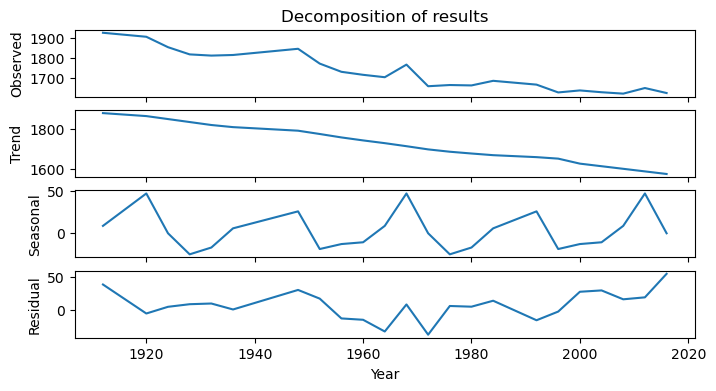

In [29]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

decomp = seasonal_decompose(df_index['results_seconds'], period = 10, model = "additive", extrapolate_trend = "freq")
fig, ax = plt.subplots(ncols=1, nrows=4, sharex=True, figsize=(8,4))
ax[0].set_title('Decomposition of results')
decomp.observed.plot(ax=ax[0], legend=False)
ax[0].set_ylabel('Observed')

decomp.trend.plot(ax=ax[1], legend=False)
ax[1].set_ylabel('Trend')

decomp.seasonal.plot(ax=ax[2], legend=False)
ax[2].set_ylabel('Seasonal')

decomp.resid.plot(ax=ax[3], legend=False)
ax[3].set_ylabel('Residual')

plt.show();

                            

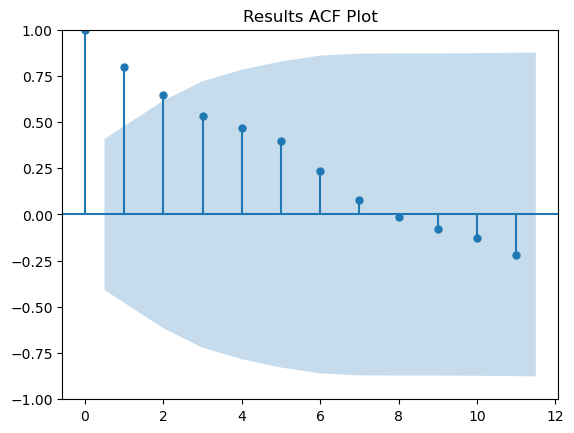

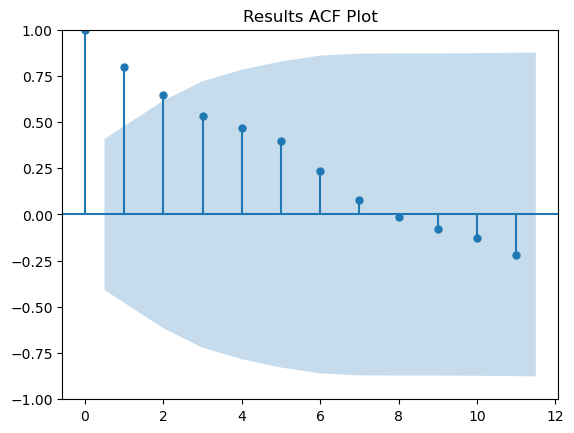

In [33]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
series = df['results_seconds']
plot_acf(series, title = "Results ACF Plot")

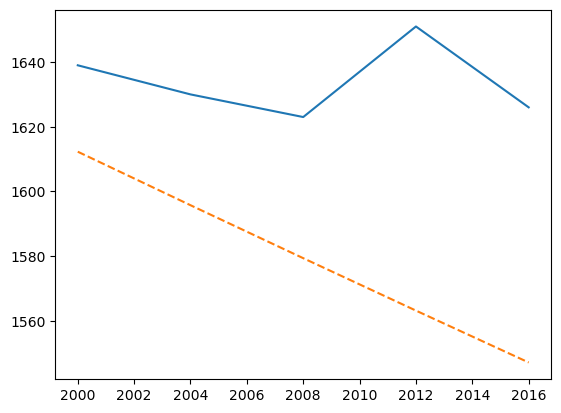

In [57]:
df_lag = df_index[['results_seconds']]
df_lag

import numpy as np
train_size = int(.8*len(df_lag))
train_data = df_lag[:train_size]
test_data = df_lag[train_size:]
y_train = np.array(train_data['results_seconds']).reshape(-1,1)
y_test = np.array(test_data['results_seconds']).reshape(-1,1)

from statsmodels.tsa.ar_model import AutoReg
ar_model = AutoReg(y_train,lags=1, trend= "n")
ar_results = ar_model.fit()
ar_results.params
ar_results.roots

ar_pred = ar_results.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1)
pred_data = pd.DataFrame({'seconds': test_data.index, 'pred results': ar_pred.flatten()})
pred_data.set_index('seconds', inplace = True)
pred_data.head()

plt.plot(test_data['results_seconds'], label = "Actual Results")
plt.plot(pred_data['pred results'], label = "AR(1) predicted", linestyle = "--")

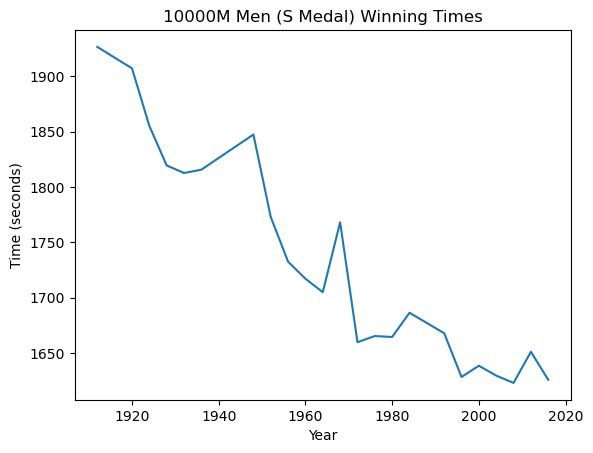

Forecasted Winning Times (in seconds):
23    1629.366384
24    1628.490646
25    1628.888997
Name: predicted_mean, dtype: float64


/Users/avaduggan/miniconda3/envs/ds/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/avaduggan/miniconda3/envs/ds/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/avaduggan/miniconda3/envs/ds/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/avaduggan/miniconda3/envs/ds/lib/python3.9/site-packages/statsmodels/tsa/state

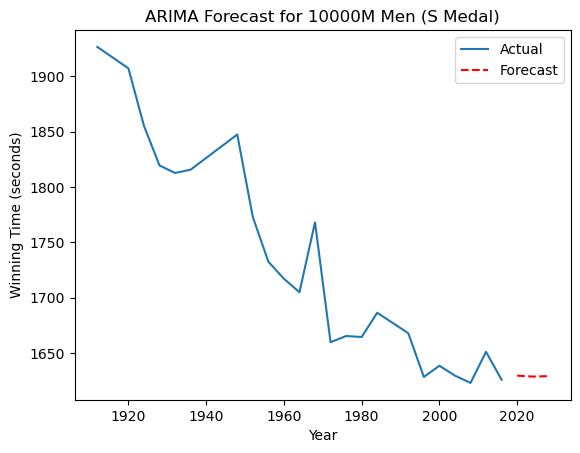

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

df = pd.read_csv("data/results.csv")

# Function to convert time results into seconds 
def time_to_seconds(time_str):
    try:
        parts = time_str.split(":")
        if len(parts) == 3:  # HH:MM:SS format
            return int(parts[0]) * 3600 + int(parts[1]) * 60 + float(parts[2])
        elif len(parts) == 2:  # MM:SS format
            return int(parts[0]) * 60 + float(parts[1])
        else:
            return np.nan  # Handle unexpected format
    except:
        return np.nan


df["Result_seconds"] = df["Result"].astype(str).apply(time_to_seconds)

# drop rows where conversion failed
df = df.dropna(subset=["Result_seconds"])

# Filter for a specific event and medal type
event = "10000M Men"
medal_type = "S"
df_filtered = df[(df["Event"] == event) & (df["Medal"] == medal_type)]

#data is sorted by year
df_filtered = df_filtered.sort_values(by="Year")

df_filtered.set_index("Year", inplace=True)
df_filtered["Result_seconds"].plot(title=f"{event} ({medal_type} Medal) Winning Times", ylabel="Time (seconds)", xlabel="Year")
plt.show()

# ARIMA model fitting
order = (2, 1, 2)  # This can be tuned based on AIC/BIC scores
model = ARIMA(df_filtered["Result_seconds"], order=order)
model_fit = model.fit()


forecast_steps = 3  # Predict for the next 3 Olympics (12 years ahead)
forecast = model_fit.forecast(steps=forecast_steps)


print("Forecasted Winning Times (in seconds):")
print(forecast)

years_future = list(range(df_filtered.index.max() + 4, df_filtered.index.max() + 4 * (forecast_steps + 1), 4))
plt.plot(df_filtered.index, df_filtered["Result_seconds"], label="Actual")
plt.plot(years_future, forecast, label="Forecast", linestyle="dashed", color="red")
plt.legend()
plt.title(f"ARIMA Forecast for {event} ({medal_type} Medal)")
plt.xlabel("Year")
plt.ylabel("Winning Time (seconds)")
plt.show()
